# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

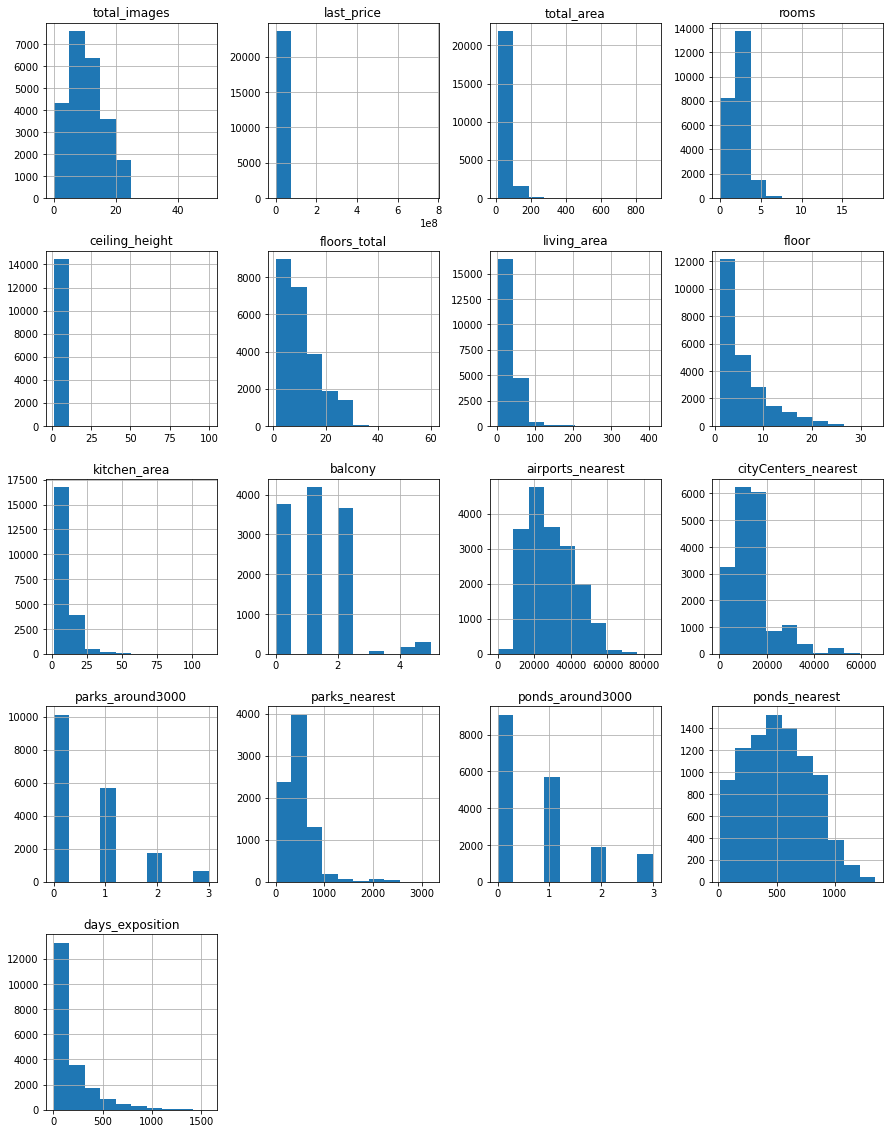

In [3]:
data.info()
data.hist(figsize=(15, 20))

### Предобработка данных

In [4]:
data.duplicated().sum()

0

In [5]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


In [6]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [7]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)

In [8]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

Количество балконов в квартире, парков и прудов рядом изменено на целое, т.к. это неделимые объекты, соответственно, не нужны дробные значения.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [10]:
data = data.dropna(subset=['locality_name'])

In [11]:
data = data.dropna(subset=['floors_total'])

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [13]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [14]:
len(data['locality_name'].unique())

364

In [15]:
data['locality_name'] = data['locality_name'].replace(['Ё', 'ё'], ['Е', 'е'], regex=True)
data.loc[data['locality_name'] == 'поселок городского типа Рябово', 'locality_name'] = 'поселок Рябово'
data.loc[data['locality_name'] == 'Никольское', 'locality_name'] = 'село Никольское'
data.loc[data['locality_name'] == 'Мурино', 'locality_name'] = 'поселок Мурино'

In [16]:
len(data['locality_name'].unique())

327

In [17]:
data_ceilings = data.loc[data['ceiling_height'] >= 10]
data_ceilings['ceiling_height'].value_counts()

27.0     8
25.0     7
32.0     2
14.0     1
20.0     1
24.0     1
27.5     1
10.3     1
22.6     1
26.0     1
100.0    1
Name: ceiling_height, dtype: int64

In [18]:
data.loc[data['ceiling_height'] == 27.0, 'ceiling_height'] = 2.7
data.loc[data['ceiling_height'] == 25.0, 'ceiling_height'] = 2.5
data.loc[data['ceiling_height'] == 27.5, 'ceiling_height'] = 2.75
data.loc[data['ceiling_height'] == 32.0, 'ceiling_height'] = 3.2
data.loc[data['ceiling_height'] == 26.0, 'ceiling_height'] = 2.6
data.loc[data['ceiling_height'] == 24.0, 'ceiling_height'] = 2.4
data.loc[data['ceiling_height'] == 22.6, 'ceiling_height'] = 2.26
data.loc[data['ceiling_height'] == 20.0, 'ceiling_height'] = 2.0
data = data[~data['ceiling_height'].isin((100.0, 10.3, 14.0))]

In [19]:
data_ceilings = data.loc[data['ceiling_height'] >= 5]
data_ceilings['ceiling_height'].value_counts()

8.0    3
5.3    2
5.0    1
5.8    1
6.0    1
8.3    1
5.2    1
5.5    1
5.6    1
Name: ceiling_height, dtype: int64

In [20]:
data_ceilings = data.loc[data['ceiling_height'] <= 1.6]
data_ceilings['ceiling_height'].value_counts()

1.0    1
1.2    1
Name: ceiling_height, dtype: int64

In [21]:
data = data[~data['ceiling_height'].isin((1.0, 1.2))]

In [22]:
median_ceilings = data.groupby('floors_total')['ceiling_height'].transform('median')
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceilings)

In [23]:
median_kitchen = data.groupby('total_area')['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(median_kitchen)

In [24]:
median_living_area = data.groupby('total_area')['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(median_living_area)

In [25]:
City_nearest = data.groupby('total_area')['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(median_living_area)

В столбцах, где было необходимо указать количество чего-либо (балконы, парки, пруды), принято решение считать, что, раз продавец не указал число, то объекта нет. Поэтому пропуски были заменены на нули.

В столбцах с площадью пропуски взяты по средним медианным значениям, т.к., обычно, в квартирах с большей площадью и большие кухни/жилые территории.

В столбце с высотой потолков изменены высоты, на порядок превышающие обычные. Единичные значения не укладывающихся ни в какую схему высот (метр или 100 метров) были откинуты.

Пропуски в столбцах с локацией и общей площадью восстановлению не подлежат, и за малым процентом также откинуты.

### Посчитайте и добавьте в таблицу новые столбцы

In [26]:
data['square_meter_price'] = data['last_price'] / data['total_area']

In [27]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

In [28]:
data['exposition_month'] = data['first_day_exposition'].dt.month

In [29]:
data['exposition_year'] = data['first_day_exposition'].dt.year

In [30]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis = 1)

In [31]:
data['km_for_center'] = data['cityCenters_nearest'] / 1000
data['km_for_center'] = data['km_for_center'].fillna(100000).astype(int)

Пропуски в столбце расстояния до центра было решено заменить на большое значение, т.к. восстановить данные невозможно, однако слишком большое количество строк не имеет данной информации, чтобы безболезненно их удалить. Таким образом, можно будет проводить исследование с данными квартирами по другим параметрам, однако в выборку по центру города они не попадут и не исказят статистику

### Проведите исследовательский анализ данных

count    23560.000000
mean        60.326110
std         35.659752
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

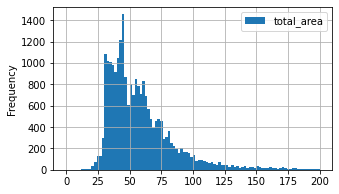

In [32]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,200))
data['total_area'].describe()

**общая площадь**

Большинство квартир имеет площадь около 50 квадратных метров, площадь более 100 квадратных метров практически не встречается.


count    23375.000000
mean        10.450891
std          5.781319
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        112.000000
Name: kitchen_area, dtype: float64

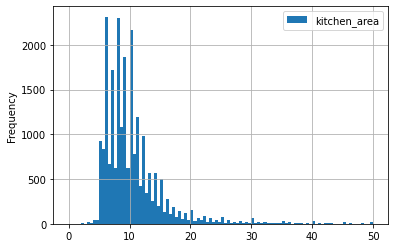

In [33]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, range = (0,50))
data['kitchen_area'].describe()

**площадь кухни**

Наиболее распространены кухни до 10 квадратных метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.


count    23427.000000
mean        34.466383
std         21.855006
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

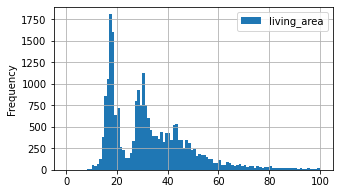

In [34]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100))
data['living_area'].describe()

**жилая площадь**

Самые распространённые варианты с жилой площадью примерно в 20, 30 и 45 метров. Подавляющая масса предложений имеет до 60 метров жилой площади. Несколько пиков графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, 2-комнатной и 3-комнатной квартиры.

count    2.356000e+04
mean     6.540029e+06
std      1.091190e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.645000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

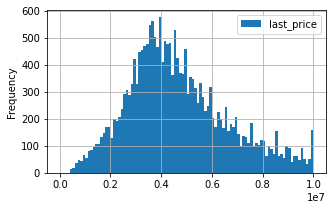

In [35]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,10000000))
data['last_price'].describe()

**цена объекта**

Наиболее распространённый сегмент предложений - квартиры с ценой около 4 миллионов. Однако можно наблюдать достаточно большой разброс цены как в одну, так и в другую сторону.


count    23560.000000
mean         2.070756
std          1.078660
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

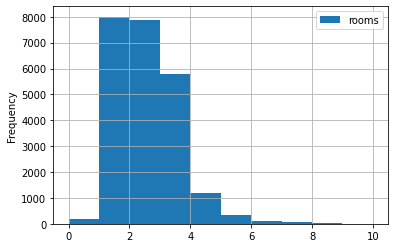

In [36]:
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, range = (0,10))
data['rooms'].describe()

**количество комнат**

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Встречаются варианты и с большим количеством комнат, возможно, объединённые из двух и более квартир.


count    23559.000000
mean         2.708466
std          0.245374
min          1.750000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

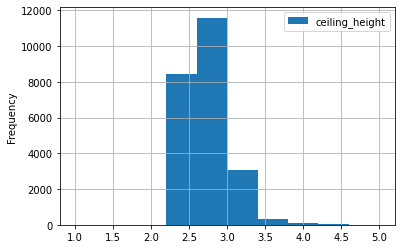

In [37]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, range = (1,5))
data['ceiling_height'].describe()

**высота потолков**

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров.


count    23560.000000
mean         5.877971
std          4.871524
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

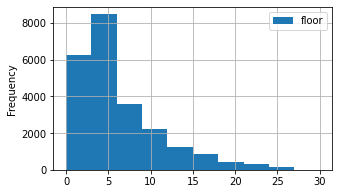

In [38]:
data.plot(y = 'floor', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0, 30))
data['floor'].describe()

**этаж квартиры**

Наибольший сегмент предложений - квартиры до 10 этажа, однако достаточное количество вариантов расположено выше.

count      23560
unique         3
top       другой
freq       17323
Name: floor_type, dtype: object

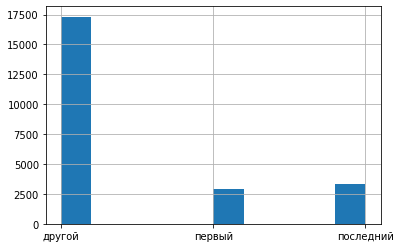

In [39]:
pd.Series(data['floor_type']).hist()  
data['floor_type'].describe()

**тип этажа квартиры («первый», «последний», «другой»)**

В плане этажности преобладают квартиры не первого и последнего этажей, что вполне закономерно.


count    23560.000000
mean        10.676061
std          6.595045
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

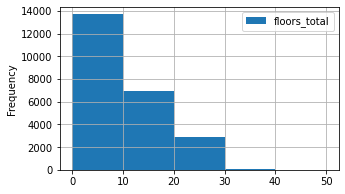

In [40]:
data.plot(y = 'floors_total', kind = 'hist', bins = 5, grid=True, figsize = (5,3), range = (0, 50))
data['floors_total'].describe()


**общее количество этажей в доме**

Преобладают строения до 10 этажей, дома выше 30 этажей встречаются крайне редко.

count    18060.000000
mean     14193.139147
std       8614.172288
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

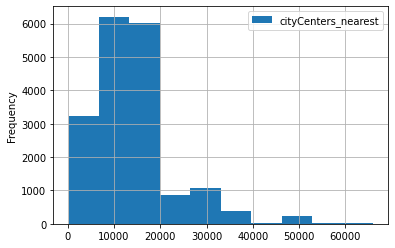

In [41]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', grid=True)
data['cityCenters_nearest'].describe()

count    18037.000000
mean     28796.861230
std      12633.222963
min          0.000000
25%      18565.000000
50%      26756.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

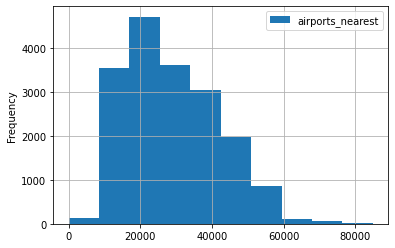

In [42]:
data.plot(y = 'airports_nearest', kind = 'hist', grid=True)
data['airports_nearest'].describe()

count    8027.000000
mean      490.644699
std       341.616139
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

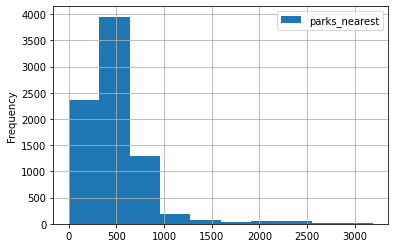

In [43]:
data.plot(y = 'parks_nearest', kind = 'hist', grid=True)
data['parks_nearest'].describe()

count    23560.000000
mean         6.401273
std          3.493169
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

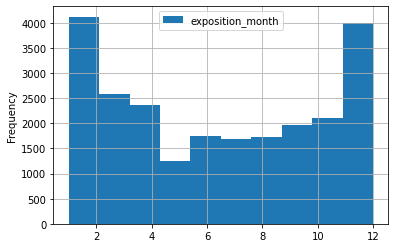

In [44]:
data.plot(y = 'exposition_month', kind = 'hist', grid=True)
data['exposition_month'].describe()

count    23560.000000
mean         2.567360
std          1.788288
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

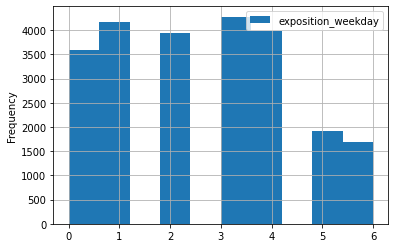

In [45]:
data.plot(y = 'exposition_weekday', kind = 'hist', grid=True)
data['exposition_weekday'].describe()

**день и месяц публикации объявления**

Больше всего квартир выставляется в будни, доля выставленных в выходные значительно меньше. Также более насыщенные месяцы - зимние.

In [46]:
print('Медианое время продажи:', round(data.query('days_exposition != 9999')['days_exposition'].median()))
print('Среднее время продажи:', round(data.query('days_exposition != 9999')['days_exposition'].mean()))

Медианое время продажи: 95
Среднее время продажи: 181


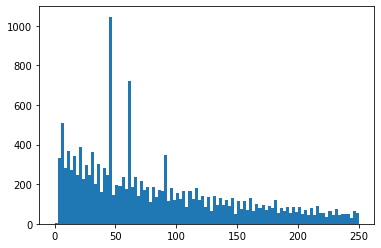

45.0      879
60.0      538
7.0       234
30.0      208
90.0      200
         ... 
969.0       1
1147.0      1
1.0         1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64

In [47]:
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.show()
data.query('days_exposition != 9999')['days_exposition'].describe()
data['days_exposition'].value_counts()


В основном квартиры продаются за 90 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Также Имеются пики на значениях в 45 и 60 дней. Это стандартный срок для объявлений на Яндекс Недвижимость. Логично предположить, что квартиры, проданные до первого пика - проданы быстро, тогда как проданные после третьего пика (90 дней) - медленно.

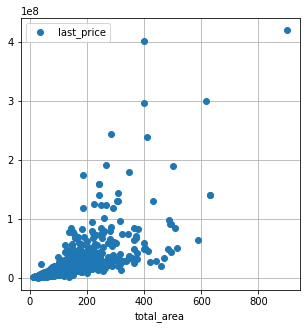

            last_price  total_area
last_price    1.000000    0.739097
total_area    0.739097    1.000000


In [48]:
(data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5)))
plt.show()
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr())

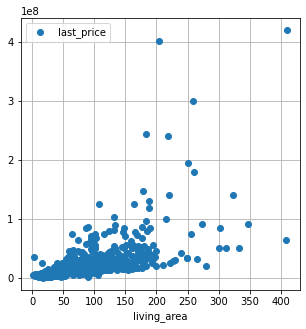

             last_price  living_area
last_price     1.000000     0.625095
living_area    0.625095     1.000000


In [49]:
(data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5)))
plt.show()
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr())

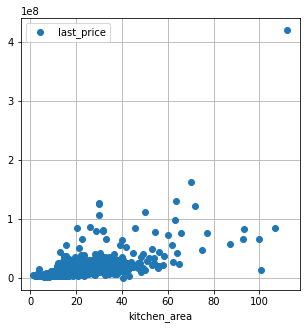

              kitchen_area  last_price
kitchen_area      1.000000    0.312245
last_price        0.312245    1.000000


In [50]:
(data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5)))
plt.show()
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr())

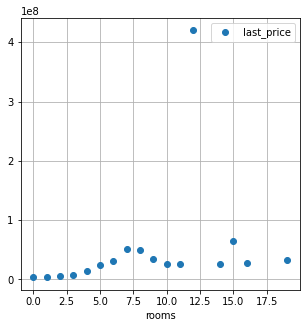

            last_price     rooms
last_price    1.000000  0.442854
rooms         0.442854  1.000000


In [51]:
(data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o', figsize=(5, 5)))
plt.show()
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr())

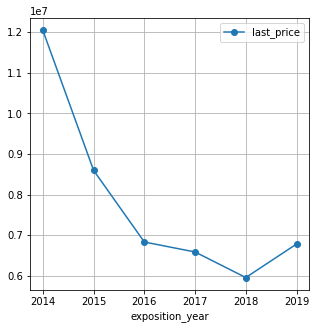

                 exposition_year  last_price
exposition_year         1.000000   -0.055135
last_price             -0.055135    1.000000


In [52]:
(data.pivot_table(index='exposition_year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5)))
plt.show()
print(data.pivot_table(index='floor', values=['exposition_year', 'last_price']).corr())

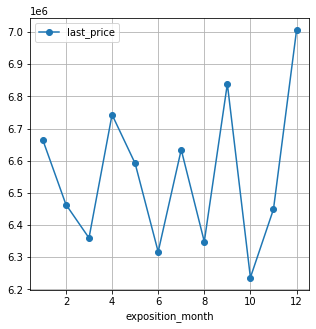

                  exposition_month  last_price
exposition_month          1.000000   -0.020593
last_price               -0.020593    1.000000


In [53]:
(data.pivot_table(index='exposition_month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5)))
plt.show()
print(data.pivot_table(index='floor', values=['exposition_month', 'last_price']).corr())

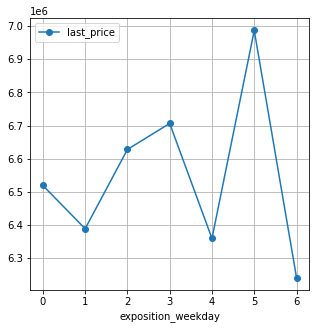

                    exposition_weekday  last_price
exposition_weekday            1.000000    0.323761
last_price                    0.323761    1.000000


In [54]:
(data.pivot_table(index='exposition_weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5)))
plt.show()
print(data.pivot_table(index='floor', values=['exposition_weekday', 'last_price']).corr())

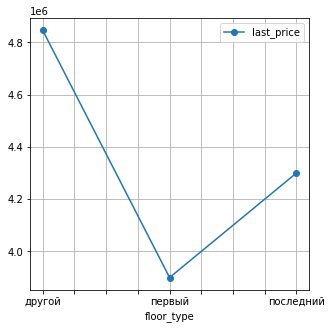

In [55]:
(data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5)))
plt.show()

In [56]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15647
поселок Мурино         586
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [57]:
Value_most_prise = data.loc[data['locality_name'] == 'Санкт-Петербург']
Value_most_prise['square_meter_price'].mean()

114839.05156264247

In [58]:
Value_most_prise = data.loc[data['locality_name'] == 'поселок Мурино']
Value_most_prise['square_meter_price'].mean()

86041.11606388402

In [59]:
Value_most_prise = data.loc[data['locality_name'] == 'поселок Шушары']
Value_most_prise['square_meter_price'].mean()

78551.34454526326

In [60]:
Value_most_prise = data.loc[data['locality_name'] == 'Всеволожск']
Value_most_prise['square_meter_price'].mean()

68654.4739860316

In [61]:
Value_most_prise = data.loc[data['locality_name'] == 'Пушкин']
Value_most_prise['square_meter_price'].mean()

103125.81929072196

In [62]:
Value_most_prise = data.loc[data['locality_name'] == 'Колпино']
Value_most_prise['square_meter_price'].mean()

75424.57909803945

In [63]:
Value_most_prise = data.loc[data['locality_name'] == 'поселок Парголово']
Value_most_prise['square_meter_price'].mean()

90175.91345801107

In [64]:
Value_most_prise = data.loc[data['locality_name'] == 'Гатчина']
Value_most_prise['square_meter_price'].mean()

68746.14676333922

In [65]:
Value_most_prise = data.loc[data['locality_name'] == 'деревня Кудрово']
Value_most_prise['square_meter_price'].mean()

92473.54757579972

In [66]:
Value_most_prise = data.loc[data['locality_name'] == 'Выборг']
Value_most_prise['square_meter_price'].mean()

58141.90915331862

In [67]:
data.groupby('locality_name')['square_meter_price'].mean().sort_values()

locality_name
деревня Старополье        11206.221198
поселок станции Свирь     11481.481481
деревня Вахнова Кара      11688.311688
деревня Выскатка          12335.480902
поселок Совхозный         12629.129129
                             ...      
Сестрорецк               101757.616875
Пушкин                   103125.819291
поселок Репино           104238.614786
Санкт-Петербург          114839.051563
Зеленогорск              115122.799198
Name: square_meter_price, Length: 327, dtype: float64

,square_meter_price
km_for_center,
0,187324.130319
1,166603.755531
2,146662.860056
3,129526.934854
4,137413.428334
5,146978.313310
6,152277.893519
7,141399.731456
8,119819.210935


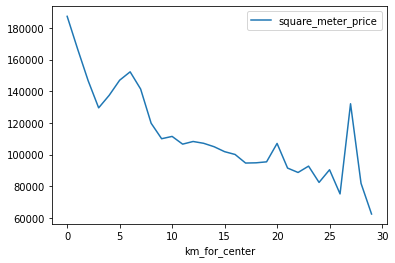

In [68]:
km_table = data.query('locality_name == "Санкт-Петербург" and km_for_center !=100000').pivot_table(index = 'km_for_center', values = 'square_meter_price', aggfunc = 'mean')
km_table.plot()
km_table

Корреляция общей площади/жилой площади и цены достаточно высока. Однако зависимость цены от площади кухни уже ниже. Как и от количества комнат.

Наиболее высоко были оценены квартиры, выставленные в декабре и в субботу.

Больше всего в предоставленных данных квартир из Санкт-Петербурга. Однако по средней стоимости данный город лишь на втором месте, уступая Зеленогорску. Наиболее дешёвые квартиры в деревне Старополье.

По мере удаления от центра города цена снижается.

### Общий вывод

Был обработан полученный массив данных - вставлены пропущенные значения там, где это возможно без потери качества будущего анализа, заменены типы данных на необходимые для удобной работы. В таблицу были добавлены цена квадратного метра жилья, тип этажа квартиры и удалённость от центра города в километрах, а также день, месяц и год размещения объявления.

Были изучены следующие параметры:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Выявлено, что на цену квартиры более всего влияет её площадь. Также довольно высок разюрос цены по месяцам и даже дням недели. Наиболее дорогие квартиры в Зеленогорске, наименее дорогие - в деревне Старополье. Больше всего квартир продаётся в городе Санкт-Петербург.